Importing liabraries for Project.
Importing numpy for numeric python, matplotlib for 2D array graphics, seaborn for advance graphics, sklearn for machine learning.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

Importing data for project and creating dat frame.

In [39]:
df = pd.read_csv("credit_train.csv")

#### Now we will check data information.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

Data is 1 lakh in quantity and there are 7 column which have null values and they don't have information for complete 1 lakh entries.
Total 19 columns we have where 12 are in float format and 7 are in object format.
Going forwar we will see the data and we will check first few entries to understand what data it is.

In [41]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


Loan ID and Customer ID is not needed for model. Loan status is our output colum. We can see in column  12  Months since last delinquent  there are more than half data having null value. We can not keep null value data for further process and as per above review this column does not seems mandatory and we can drop it.

In [42]:
df.drop(["Loan ID", "Customer ID", "Months since last delinquent"], axis=1, inplace=True)

On the basis of this we need to create model which will tell us if we should give the loan or not and will the customer will repay it or not. We will also need to check what will be the probability for defaults.
We will check how much value we have in our data.

In [43]:
df.isna().sum()

Loan Status                    514
Current Loan Amount            514
Term                           514
Credit Score                 19668
Annual Income                19668
Years in current job          4736
Home Ownership                 514
Purpose                        514
Monthly Debt                   514
Years of Credit History        514
Number of Open Accounts        514
Number of Credit Problems      514
Current Credit Balance         514
Maximum Open Credit            516
Bankruptcies                   718
Tax Liens                      524
dtype: int64

So in this data we can see minimum 514 null values contained by colum and maximum is 53655. We need to drop this.
We can see in column 12 Months since last delinquent there are more than half data having null value. Credit score, Anual Income and Years in current job colums are holding more null values. 
We will check all columns one by one to check what exactly null values are.

In [44]:
df["Credit Score"].describe()

count    80846.000000
mean      1076.456089
std       1475.403791
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

Credit score data is not correct because maximum credit score is showing 7510 and actual maximum limit of credit score is 900.

In [45]:
df[df["Credit Score"]<=900]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


#### We can see there 76295 records are showing more than <=900 credit score. So we will keep these records and will delete others.

In [46]:
df = df[df["Credit Score"]<=900]

In [47]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0


Lets check null values now.

In [48]:
df.isna().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job         3166
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                  152
Tax Liens                       6
dtype: int64

> So now we have 3166 null values in Years in current job, 152 null values in Bankruptics and 6 in Tax Liens.

In [49]:
df["Years in current job"].value_counts(dropna=False)

Years in current job
10+ years    23972
2 years       6983
3 years       6244
< 1 year      6197
5 years       5186
1 year        4846
4 years       4670
6 years       4299
7 years       4226
8 years       3509
NaN           3166
9 years       2997
Name: count, dtype: int64

> We can see there are multiple values available as per above records apart from null. We have to drop null values.

In [50]:
df.dropna(inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72977 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                72977 non-null  object 
 1   Current Loan Amount        72977 non-null  float64
 2   Term                       72977 non-null  object 
 3   Credit Score               72977 non-null  float64
 4   Annual Income              72977 non-null  float64
 5   Years in current job       72977 non-null  object 
 6   Home Ownership             72977 non-null  object 
 7   Purpose                    72977 non-null  object 
 8   Monthly Debt               72977 non-null  float64
 9   Years of Credit History    72977 non-null  float64
 10  Number of Open Accounts    72977 non-null  float64
 11  Number of Credit Problems  72977 non-null  float64
 12  Current Credit Balance     72977 non-null  float64
 13  Maximum Open Credit        72977 non-null  float64


## We still have 72977 data which is enough. We will just check duplicates now.

In [52]:
df.duplicated().sum()

9781

## There are 9781 records which are duplicate. let remove them.

In [53]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## There are no more duplicates remaining. These are duplicates of complete raw.

In [54]:
df.head(3)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0


In [55]:
## Now we will reset the index

In [56]:
df.reset_index()

,index,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
2,3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
3,6,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
4,8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63191,99990,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,9.0,0.0,37392.0,134442.0,0.0,0.0
63192,99994,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
63193,99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
63194,99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


In [57]:
df.reset_index(drop=True, inplace=True)

In [58]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
2,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
3,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
4,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63191,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,9.0,0.0,37392.0,134442.0,0.0,0.0
63192,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
63193,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
63194,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0


### Now we will convert the year in current job column to number. The purpose is to convert maximum columns to numbers.

In [59]:
df["Years in current job"] = df["Years in current job"].str.replace(" years","")
df["Years in current job"]

0               8
1               8
2               3
3        < 1 year
4               2
           ...   
63191    < 1 year
63192      1 year
63193      1 year
63194           6
63195           9
Name: Years in current job, Length: 63196, dtype: object

### Now we will convert less than year to 0 and 1 year to blank.

In [60]:
df["Years in current job"]= df["Years in current job"].str.replace("< 1 year", "0")

In [61]:
df["Years in current job"]

0             8
1             8
2             3
3             0
4             2
          ...  
63191         0
63192    1 year
63193    1 year
63194         6
63195         9
Name: Years in current job, Length: 63196, dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63196 entries, 0 to 63195
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                63196 non-null  object 
 1   Current Loan Amount        63196 non-null  float64
 2   Term                       63196 non-null  object 
 3   Credit Score               63196 non-null  float64
 4   Annual Income              63196 non-null  float64
 5   Years in current job       63196 non-null  object 
 6   Home Ownership             63196 non-null  object 
 7   Purpose                    63196 non-null  object 
 8   Monthly Debt               63196 non-null  float64
 9   Years of Credit History    63196 non-null  float64
 10  Number of Open Accounts    63196 non-null  float64
 11  Number of Credit Problems  63196 non-null  float64
 12  Current Credit Balance     63196 non-null  float64
 13  Maximum Open Credit        63196 non-null  flo

## Now we will convert this column in int

In [63]:
df["Years in current job"].astype(np.int32)

ValueError: invalid literal for int() with base 10: '10+'

### We Will change 10+ to 10 now.

In [64]:
df["Years in current job"] = df["Years in current job"].str.replace("10+","10")

In [65]:
df["Years in current job"].astype(np.int32)

ValueError: invalid literal for int() with base 10: '1 year'

In [66]:
df["Years in current job"] = df["Years in current job"].str.replace(" year","")

In [69]:
df["Years in current job"].astype(np.int32)
df["Years in current job"] = df["Years in current job"].astype(np.int32)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63196 entries, 0 to 63195
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                63196 non-null  object 
 1   Current Loan Amount        63196 non-null  float64
 2   Term                       63196 non-null  object 
 3   Credit Score               63196 non-null  float64
 4   Annual Income              63196 non-null  float64
 5   Years in current job       63196 non-null  int32  
 6   Home Ownership             63196 non-null  object 
 7   Purpose                    63196 non-null  object 
 8   Monthly Debt               63196 non-null  float64
 9   Years of Credit History    63196 non-null  float64
 10  Number of Open Accounts    63196 non-null  float64
 11  Number of Credit Problems  63196 non-null  float64
 12  Current Credit Balance     63196 non-null  float64
 13  Maximum Open Credit        63196 non-null  flo

In [72]:
np.round(df.describe())

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,63196.0,63196.0,63196.0,63196.0,63196.0,63196.0,63196.0,63196.0,63196.0,6.319600e+04,63196.0,63196.0
mean,17710896.0,719.0,1401045.0,6.0,18650.0,18.0,11.0,0.0,296645.0,7.621840e+05,0.0,0.0
std,37837305.0,28.0,923252.0,4.0,12283.0,7.0,5.0,0.0,361551.0,7.692223e+06,0.0,0.0
min,15422.0,585.0,76627.0,0.0,0.0,4.0,1.0,0.0,0.0,0.000000e+00,0.0,0.0
25%,195965.0,707.0,864823.0,3.0,10396.0,14.0,8.0,0.0,113981.0,2.789540e+05,0.0,0.0
50%,330407.0,726.0,1207089.0,6.0,16352.0,17.0,10.0,0.0,212078.0,4.773120e+05,0.0,0.0
75%,608432.0,740.0,1682811.0,10.0,24154.0,22.0,14.0,0.0,370600.0,7.980560e+05,0.0,0.0
max,99999999.0,751.0,36475440.0,10.0,435843.0,70.0,76.0,15.0,12986956.0,1.539738e+09,7.0,15.0


### We will need to check year of credit history, current loan and annual income.

<Axes: >

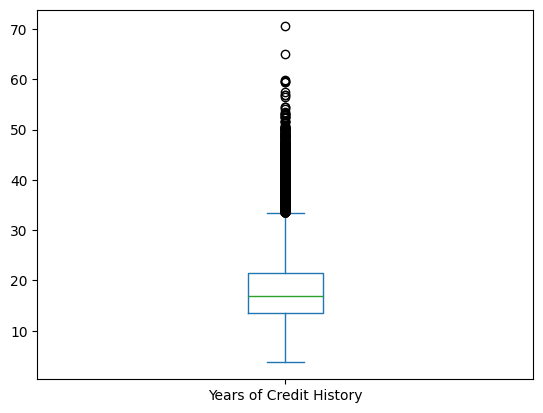

In [73]:
df["Years of Credit History"].plot.box()

### There are many outlier we can see. We will drop data from year of credit history for above 50.

In [75]:
round(df[df["Years of Credit History"]<=50].describe())

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,63156.0,63156.0,63156.0,63156.0,63156.0,63156.0,63156.0,63156.0,63156.0,6.315600e+04,63156.0,63156.0
mean,17707699.0,719.0,1400604.0,6.0,18643.0,18.0,11.0,0.0,296533.0,7.620140e+05,0.0,0.0
std,37834577.0,28.0,922028.0,4.0,12261.0,7.0,5.0,0.0,361477.0,7.694618e+06,0.0,0.0
min,15422.0,585.0,76627.0,0.0,0.0,4.0,1.0,0.0,0.0,0.000000e+00,0.0,0.0
25%,195965.0,707.0,864747.0,3.0,10396.0,13.0,8.0,0.0,113981.0,2.789380e+05,0.0,0.0
50%,330396.0,726.0,1206975.0,6.0,16352.0,17.0,10.0,0.0,212050.0,4.771800e+05,0.0,0.0
75%,608382.0,740.0,1682469.0,10.0,24149.0,22.0,14.0,0.0,370386.0,7.977040e+05,0.0,0.0
max,99999999.0,751.0,36475440.0,10.0,435843.0,50.0,76.0,15.0,12986956.0,1.539738e+09,7.0,15.0
